In [72]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions.multi_gradient_descent import *

In [73]:
def feature_scaling(data):
    k = np.zeros(data.shape[1])
    # for r in range(data.shape[0]):
    for c in range(data.shape[1]):
        k[c] = np.sum(data[:,c])
    k = k/data.shape[0]
    for c in range(data.shape[1]):
        f = np.max(data[:,c]) - np.min(data[:,c])
        data[:,c] -= k[c]
        data[:,c] /= f
    return data
        

In [74]:
file = "./data from book/advertising.csv"
data = pd.read_csv(file)
print(data.head())
x_data = np.array([[x,x**2] for x in data['TV']])
x_test = x_data[150:]
x_data = x_data[0:150]

y_data = np.array(data['sales'])
y_test = y_data[150:]
y_data = y_data[0:150]


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [75]:
# # fetaure scaling
# x_data = feature_scaling(x_data)
# y_data = feature_scaling(y_data)

In [76]:
w = np.ones(x_data.shape[1])
b=0
per_w,per_b = gradient_descent(x_data,y_data,w,b,0.00000000006,50)
print(per_w, per_b)

[0.99963158 0.91436249] -1.6843038879999992e-06 -------------------------------- j:  599448600.3279654 dj_dw:  [6.14029455e+06 1.42729182e+09] dj_db:  28071.731466666653
[0.99730042 0.37256215] -1.234448197410997e-05 -------------------------------- j:  100764907.82486089 dj_dw:  [2.51829586e+06 5.85181263e+08] dj_db:  11520.331872519562
[0.99634417 0.15042719] -1.672174447413911e-05 -------------------------------- j:  16938580.278722994 dj_dw:  [1.03329766e+06 2.39920878e+08] dj_db:  4734.3552173861535
[0.99595163 0.05935316] -1.85230484703459e-05 -------------------------------- j:  2847778.241477464 dj_dw:  [  424457.11532686 98366147.77770063] dj_db:  1952.1446246885587
[0.9957902  0.02201335] -1.926822459920574e-05 -------------------------------- j:  479182.2653580959 dj_dw:  [  174836.06729282 40329539.49385499] dj_db:  811.4546074768529
[0.99572788 0.00769634] -1.955976779399625e-05


In [77]:
# t = np.arange(0,150,1)
# t = np.array([[x,x**2] for x in t])
# pred = predict_graph(t,per_w,per_b)
pred = predict_graph(x_data,per_w,per_b)
pred

array([6.36607282e+02, 5.95505418e+01, 1.94033842e+01, 3.27500997e+02,
       4.31610358e+02, 9.24534873e+00, 8.27003466e+01, 2.30883451e+02,
       9.13246128e+00, 5.06184477e+02, 9.94445043e+01, 5.68553782e+02,
       2.80578169e+01, 1.70246749e+02, 5.23832873e+02, 4.88420268e+02,
       1.02889159e+02, 8.89639610e+02, 1.05759335e+02, 3.13660345e+02,
       5.84571124e+02, 6.70141768e+02, 1.44845982e+01, 6.28464570e+02,
       9.19055418e+01, 7.93719998e+02, 2.99451844e+02, 6.82752735e+02,
       7.24151397e+02, 1.08659681e+02, 9.51920551e+02, 2.10518320e+02,
       1.69498487e+02, 8.07390750e+02, 1.65777961e+02, 9.39848469e+02,
       8.14012986e+02, 1.17327104e+02, 5.72126440e+01, 6.27112300e+02,
       5.17232780e+02, 4.17362345e+02, 9.55777291e+02, 5.35477856e+02,
       2.98415193e+01, 4.10321690e+02, 1.51242189e+02, 6.81814741e+02,
       6.23513020e+02, 1.01059977e+02, 5.06184477e+02, 1.77551364e+02,
       5.75886934e+02, 4.38436996e+02, 7.92711813e+02, 5.02526645e+02,
      

[0.99572788 0.00769634] -0.00001956


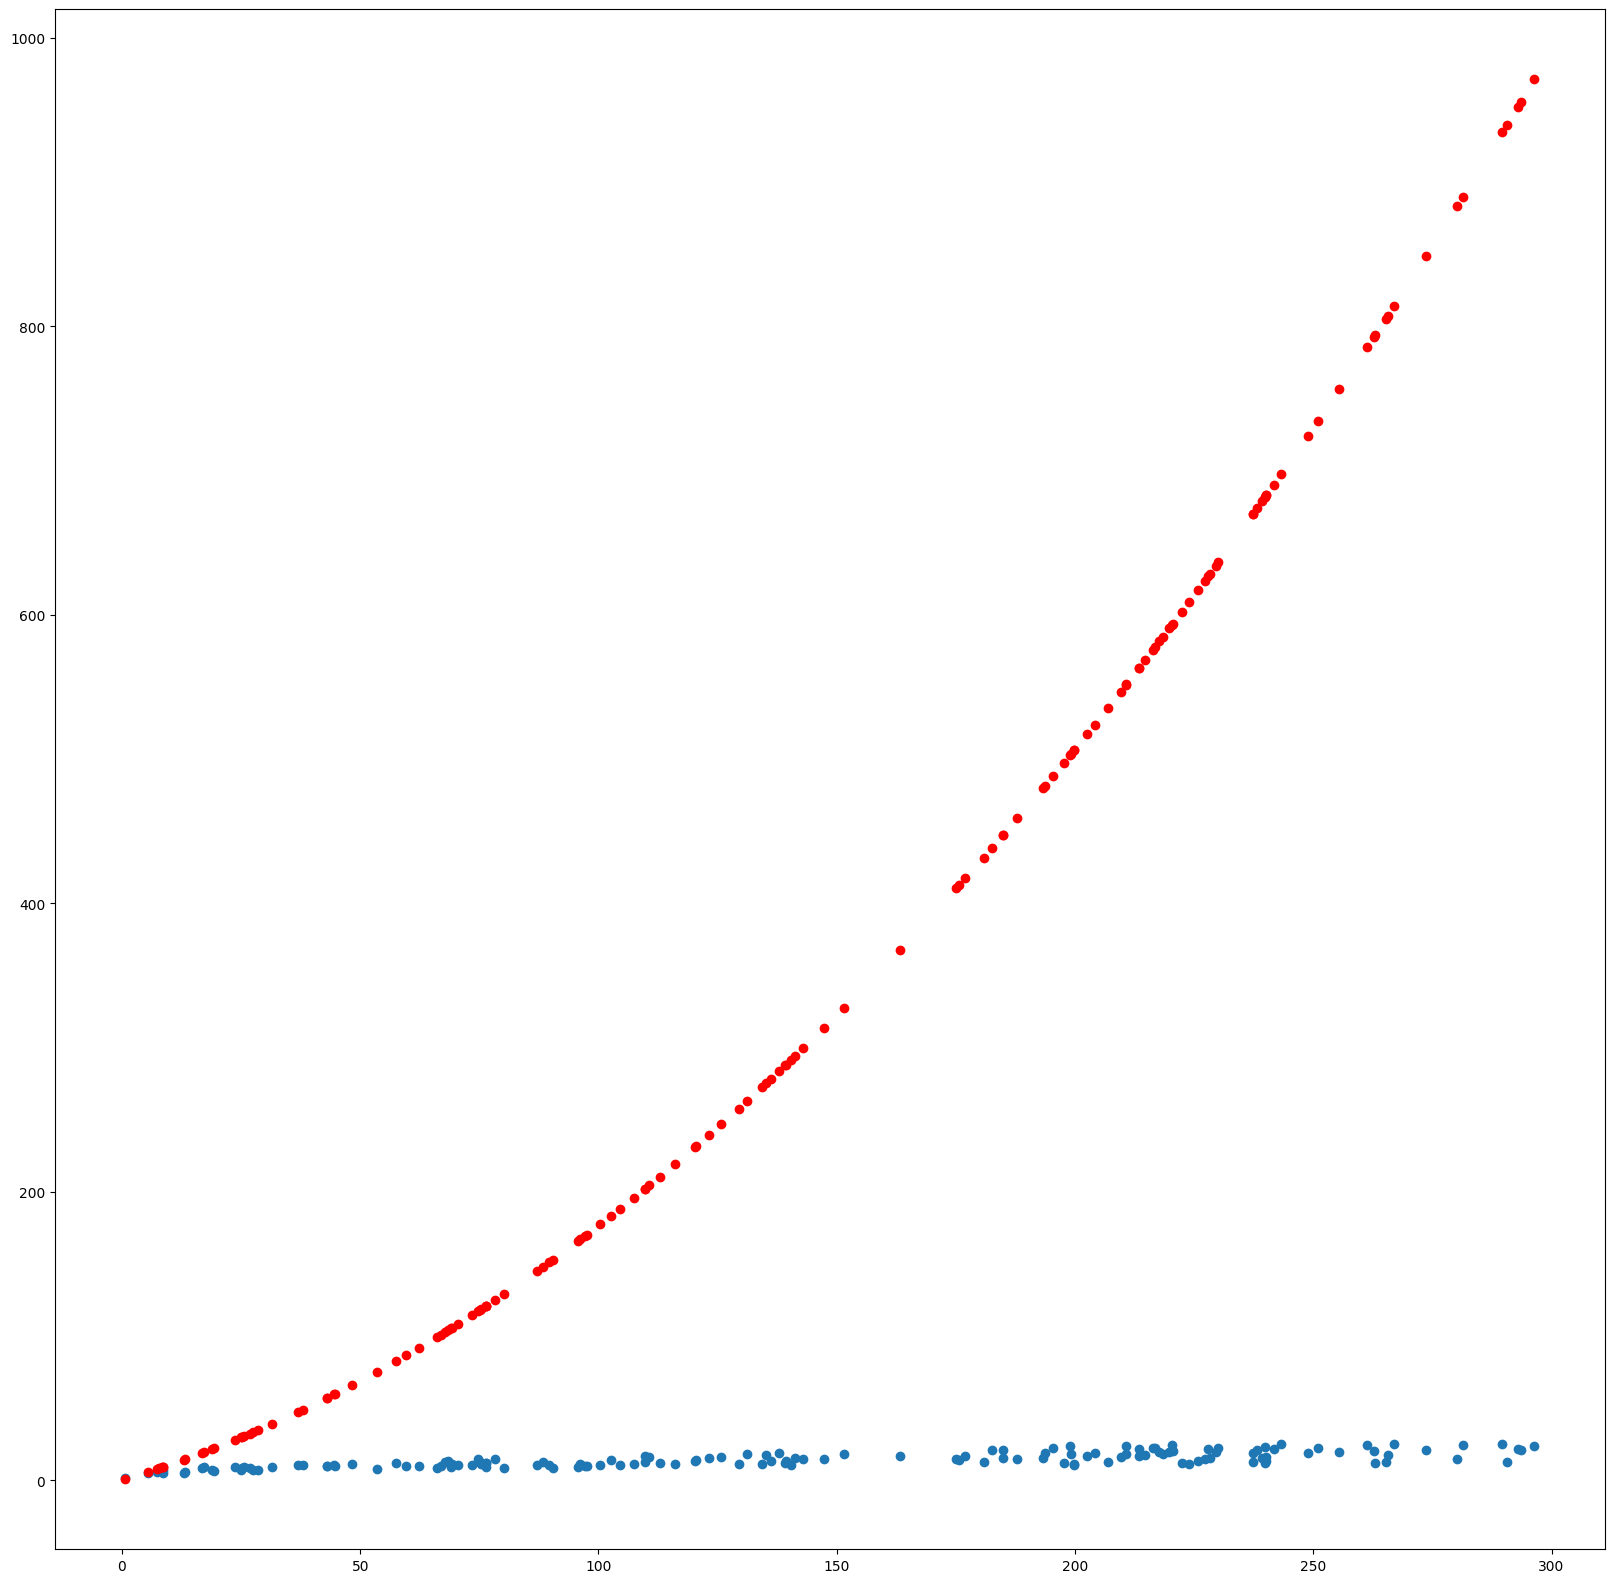

In [78]:
print(per_w,'%.08f' %per_b)
pl.figure(figsize=[20,20])
pl.scatter(x_data[:,0],y_data)
pl.scatter(x_data[:,0],pred,color= "red")
pl.show()

In [79]:
print(accuracy(x_test, y_test,per_w,per_b))

2612.725454278695
